<a href="https://colab.research.google.com/github/iirthw/Vision_sandbox/blob/main/mnist/validate_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [19]:
from tensorflow.keras.datasets import mnist
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()

In [20]:
data_train = pickle.load(open('data_train.pkl','rb'))
data_test = pickle.load(open('data_test.pkl','rb'))
print('Loaded ' + str(data_train[0].shape[0]) + ' train data')
print('Loaded ' + str(data_test[0].shape[0]) + ' test data')

Loaded 1250 train data
Loaded 162 test data


In [21]:
x_train = data_train[0]
x_train = x_train[..., np.newaxis]
y_train = data_train[1]
y_train = tf.keras.utils.to_categorical(y_train, 10)

y_train0 = tf.keras.utils.to_categorical(y_train0, 10)
y_test0 = tf.keras.utils.to_categorical(y_test0, 10)
x_test0 = x_test0[..., np.newaxis]

x_test = data_test[0]
x_test = x_test[..., np.newaxis]
y_test = data_test[1]
y_test = tf.keras.utils.to_categorical(y_test, 10)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_test0.shape)
print(y_test0.shape)

PIXEL_DEPTH = 255
x_train = (x_train - (PIXEL_DEPTH / 2.0)) / PIXEL_DEPTH
x_test = (x_test - (PIXEL_DEPTH / 2.0)) / PIXEL_DEPTH
x_train0 = (x_train0 - (PIXEL_DEPTH / 2.0)) / PIXEL_DEPTH
x_test0 = (x_test0 - (PIXEL_DEPTH / 2.0)) / PIXEL_DEPTH

(1250, 28, 28, 1)
(1250, 10)
(162, 28, 28, 1)
(162, 10)
(10000, 28, 28, 1)
(10000, 10)


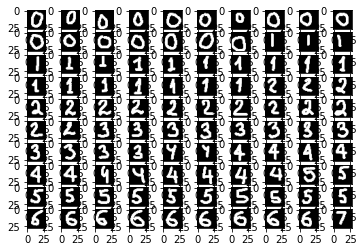

In [22]:
fig = plt.figure()
nx = 10
ny = 10
gs = fig.add_gridspec(ny, nx)
k = 0
for i in range(ny):
  for j in range(nx):
    ax = fig.add_subplot(gs[i, j])
    ax.imshow(x_test[k, :, :].squeeze(), cmap='gist_gray')
    k = k + 1

In [15]:
model = tf.keras.models.load_model('mnist_cnn_full_0.9.h5')
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 26, 26, 6)         60        
                                                                 
 average_pooling2d_14 (Avera  (None, 13, 13, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_39 (Conv2D)          (None, 11, 11, 16)        880       
                                                                 
 average_pooling2d_15 (Avera  (None, 5, 5, 16)         0         
 gePooling2D)                                                    
                                                                 
 flatten_19 (Flatten)        (None, 400)               0         
                                                                 
 dense_45 (Dense)            (None, 120)             

In [51]:
tf.config.run_functions_eagerly(True)
print(x_train.shape)
print(x_test0.shape)
print(y_test0.shape)
model.fit(x_train, y_train, 
          batch_size=128,
          epochs=10, verbose=1, validation_data=(x_test, y_test))

(1250, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 10)
Epoch 1/10
 2/10 [=====>........................] - ETA: 0s - loss: 0.0088 - accuracy: 0.9961

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


10/10 [==============================] - 1s 71ms/step - loss: 0.0064 - accuracy: 0.9992 - val_loss: 1.1670 - val_accuracy: 0.8642
Epoch 2/10
10/10 [==============================] - 1s 69ms/step - loss: 0.0066 - accuracy: 0.9992 - val_loss: 1.1295 - val_accuracy: 0.8519
Epoch 3/10
10/10 [==============================] - 1s 69ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 1.1487 - val_accuracy: 0.8704
Epoch 4/10
10/10 [==============================] - 1s 73ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 1.1731 - val_accuracy: 0.8519
Epoch 5/10
10/10 [==============================] - 1s 68ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 1.1759 - val_accuracy: 0.8580
Epoch 6/10
10/10 [==============================] - 1s 74ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 1.1939 - val_accuracy: 0.8580
Epoch 7/10
10/10 [==============================] - 1s 71ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 1.2006 - val_accuracy: 0.8642
Epoch 8/10
10/10 [======

In [50]:
accuracy = 0
correct = 0
nn = 160
for i in range(nn):
  x = x_test[i,...].reshape(1, 28, 28, 1)
  y = y_test[i,...]
  pred = np.argmax(model.predict(x))
  label = np.argmax(y)
  if label == pred:
    res = '✓'
    correct += 1
  else:
    res = 'X'
  # print(str(label) + ' - ' + str(pred) + ' (' + res + ')')

accuracy = correct / nn
print('accuracy: ' + str(accuracy))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


accuracy: 0.85625


In [46]:
acc_str = str(round(accuracy, 3))
acc_str = acc_str.replace('.', '_')
model_name = 'mnist_acc_' + acc_str + '.h5'
print(model_name)
model.save(model_name)

mnist_acc_0_85.h5


In [ ]:
for i in range(Y_test.shape[0]):
  X = X_test[i,...]
  X = X[np.newaxis,...]
  Y = Y_test[i,...]
  Y = Y[np.newaxis,...]
  res = model.evaluate(X, Y)
  print(res)